# Lab 1 - Creating a Slice with a P4 Switch

This lab will walk you through creating an experiment that contains a a P4 programmable switch. The P4 switch that we will use is a software switch known as the behavioral model (BMv2).  Specifically, the experiment deploys a slice with three nodes: two end-hosts and a P4 switch. The topology is shown in the figure below

![Topology](./images/bmv2-p4-3switches.png)

# Step 1:  Configure the Environment

Before running this notebook, you will need to configure your environment using the [Configure Environment](../../../configure.ipynb) notebook. Please stop here, open and run that notebook, then return to this notebook.

If you are using the FABRIC JupyterHub many of the environment variables will be automatically configured for you.  You will still need to set your bastion username, upload your bastion private key, and set the path to where you put your bastion private key. Your bastion username and private key should already be in your possession.  

If you are using the FABRIC API outside of the JupyterHub you will need to configure all of the environment variables. Defaults below will be correct in many situations but you will need to confirm your configuration.  If you have questions about this configuration, please contact the FABRIC admins using the [FABRIC User Forum](https://learn.fabric-testbed.net/forums/) 

More information about accessing your experiments through the FABRIC bastion hosts can be found [here](https://learn.fabric-testbed.net/knowledge-base/logging-into-fabric-vms/).
 

# Step 2: Import the FABlib Library

In [4]:
from fabrictestbed_extensions.fablib.fablib import FablibManager as fablib_manager
fablib = fablib_manager()

# Step 3: Create the Experiment Slice

The following creates three node with basic compute and networking capabilities. You build a slice by creating a new slice and adding resources to the slice. After you build the slice, you must submit a request for the slice to be instantiated.   

### Step 3.1: Create a slice
The code below creates a new slice with the name "lab1"

In [5]:
slice = fablib.new_slice(name="lab1")

### Step 3.2: Define the sites
The code below requests three sites from FABRIC: INDI, STAR, and NCSA

<img src="./labs_files/lab1/figs/fabric_sites.png" width="550px"><br>

In [6]:
site1='SALT'
site2='STAR'
site3='ATLA'
site4='WASH'
site5='DALL'
site6='PSC'

print (f'The selected sites are {site1}, {site2}, {site3} {site4} {site5} {site6}') 

The selected sites are SALT, STAR, ATLA WASH DALL PSC


### Step 3.3: Creating the nodes
The code below creates three nodes: server1, server2 and server3. The servers (server1, server2 and server3) use the following:
<ul>
    <li> 4 CPU cores</li>
    <li> 8GB RAM </li>
    <li> 20GB disc size </li>
    <li> Image: Ubuntu 20.04
</ul>

server1 will be created in site1, server2 will be created on site2 and server3 will be created in site3


![Topology](./images/bmv2-p4-3switches.png)

In [7]:
server1 = slice.add_node(name="server1", 
                      site=site1, 
                      cores=4, 
                      ram=8, 
                      disk=20, 
                      image='default_ubuntu_20')

server2 = slice.add_node(name="server2", 
                      site=site2, 
                      cores=4, 
                      ram=8, 
                      disk=20, 
                      image='default_ubuntu_20')

server3 = slice.add_node(name="server3", 
                      site=site3, 
                      cores=4, 
                      ram=8, 
                      disk=20, 
                      image='default_ubuntu_20')


### Step 3.4: Adding the interfaces to the servers
The code below adds a Network Interface Card (NIC) to each server.

In [8]:
server1_iface = server1.add_component(model='NIC_Basic').get_interfaces()[0]
server2_iface = server2.add_component(model='NIC_Basic').get_interfaces()[0]
server3_iface = server3.add_component(model='NIC_Basic').get_interfaces()[0]

### Step 3.5: Creating a node for the P4 switches
The code below creates nodes that will run the P4 switches. The node use the following
<ul>
    <li> 16 CPU cores</li>
    <li> 8GB RAM </li>
    <li> 40GB disc size </li>
    <li> Image: Ubuntu 20.04
</ul>

- Switch1 will be created on site4
- Switch2 will be created on site5
- Switch3 will be created on site6


In [9]:
# Add a node
switch1 = slice.add_node(name="switch1", 
                      site=site4, 
                      cores=32, 
                      ram=16, 
                      disk=40, 
                      image='default_ubuntu_20')

In [10]:
# Add a node
switch2 = slice.add_node(name="switch2", 
                      site=site5, 
                      cores=32, 
                      ram=16, 
                      disk=40, 
                      image='default_ubuntu_20')

In [11]:
# Add a node
switch3 = slice.add_node(name="switch3", 
                      site=site6, 
                      cores=32, 
                      ram=16, 
                      disk=40, 
                      image='default_ubuntu_20')

### Step 3.6: Adding two interfaces to the switch
The code below adds two Network Interface Cards (NICs) to the switch.

In [12]:
switch1_iface1 = switch1.add_component(model='NIC_Basic', name='net1_nic').get_interfaces()[0]
switch1_iface2 = switch1.add_component(model='NIC_Basic', name='net2_nic').get_interfaces()[0]
switch1_iface3 = switch1.add_component(model='NIC_Basic', name='net4_nic').get_interfaces()[0]

In [13]:
switch2_iface1 = switch2.add_component(model='NIC_Basic', name='net2_nic').get_interfaces()[0]
switch2_iface2 = switch2.add_component(model='NIC_Basic', name='net3_nic').get_interfaces()[0]
switch2_iface3 = switch2.add_component(model='NIC_Basic', name='net5_nic').get_interfaces()[0]

In [14]:
switch3_iface1 = switch3.add_component(model='NIC_Basic', name='net4_nic').get_interfaces()[0]
switch3_iface2 = switch3.add_component(model='NIC_Basic', name='net5_nic').get_interfaces()[0]
switch3_iface3 = switch3.add_component(model='NIC_Basic', name='net6_nic').get_interfaces()[0]

### Step 3.7: Connecting site1 and site2
Create a site-to-site network between 
- Server1 and Switch1
- Switch1 and Switch2
- Switch2 and Server2
- Switch1 and Switch3
- Switch2 and Switch3
- Switch3 and Server3

![Topology](./images/bmv2-p4-3switches.png)

In [15]:
net1 = slice.add_l2network(name='server1-switch1', interfaces=[server1_iface, switch1_iface1])

In [16]:
net2 = slice.add_l2network(name='switch1-switch2', interfaces=[switch1_iface2, switch2_iface1])

In [17]:
net3 = slice.add_l2network(name='server2-switch2', interfaces=[switch2_iface2, server2_iface])

In [18]:
net4 = slice.add_l2network(name='switch1-switch3', interfaces=[switch1_iface3, switch3_iface1])

In [19]:
net5 = slice.add_l2network(name='switch2-switch3', interfaces=[switch2_iface3, switch3_iface2])

In [20]:
net6 = slice.add_l2network(name='server3-switch3', interfaces=[switch3_iface3, server3_iface])

### Step 3.9: Submitting the slice
The code below submits the slice. 
By default, the submit function will block until the node is ready and will display the progress of your slice being built.

In [21]:
#Submit Slice Request
slice.submit();


Retry: 11, Time: 306 sec


ID,337f88bc-6ac1-4c07-a12b-60c5785100ad
Name,lab1
Lease Expiration (UTC),2024-10-03 15:25:36 +0000
Lease Start (UTC),2024-10-02 15:25:36 +0000
Project ID,16eafd43-3e6c-4546-854c-935eea16552a
State,StableOK


ID,Name,Cores,RAM,Disk,Image,Image Type,Host,Site,Username,Management IP,State,Error,SSH Command,Public SSH Key File,Private SSH Key File
76a1933d-d59a-4b5f-bc16-6035bf7a78b2,server1,4,8,100,default_ubuntu_20,qcow2,salt-w2.fabric-testbed.net,SALT,ubuntu,2001:400:a100:3010:f816:3eff:fe58:f167,Active,,ssh -i /home/fabric/work/fabric_config/slice_key -F /home/fabric/work/fabric_config/ssh_config ubuntu@2001:400:a100:3010:f816:3eff:fe58:f167,/home/fabric/work/fabric_config/slice_key.pub,/home/fabric/work/fabric_config/slice_key
e64d4945-308e-482c-8a35-b5ee92378248,server2,4,8,100,default_ubuntu_20,qcow2,star-w1.fabric-testbed.net,STAR,ubuntu,2001:400:a100:3030:f816:3eff:fe65:984,Active,,ssh -i /home/fabric/work/fabric_config/slice_key -F /home/fabric/work/fabric_config/ssh_config ubuntu@2001:400:a100:3030:f816:3eff:fe65:984,/home/fabric/work/fabric_config/slice_key.pub,/home/fabric/work/fabric_config/slice_key
66474f71-5907-4315-9191-f45c9b1e56a8,server3,4,8,100,default_ubuntu_20,qcow2,atla-w2.fabric-testbed.net,ATLA,ubuntu,2001:400:a100:3050:f816:3eff:fecd:7bce,Active,,ssh -i /home/fabric/work/fabric_config/slice_key -F /home/fabric/work/fabric_config/ssh_config ubuntu@2001:400:a100:3050:f816:3eff:fecd:7bce,/home/fabric/work/fabric_config/slice_key.pub,/home/fabric/work/fabric_config/slice_key
f7d06a97-6cfb-435f-b94a-4fbf40112e6b,switch1,32,16,100,default_ubuntu_20,qcow2,wash-w3.fabric-testbed.net,WASH,ubuntu,2001:400:a100:3020:f816:3eff:feb8:f20,Active,,ssh -i /home/fabric/work/fabric_config/slice_key -F /home/fabric/work/fabric_config/ssh_config ubuntu@2001:400:a100:3020:f816:3eff:feb8:f20,/home/fabric/work/fabric_config/slice_key.pub,/home/fabric/work/fabric_config/slice_key
1151a95d-1d6e-45d3-a0e7-51710c11a389,switch2,32,16,100,default_ubuntu_20,qcow2,dall-w2.fabric-testbed.net,DALL,ubuntu,2001:400:a100:3000:f816:3eff:feb2:5914,Active,,ssh -i /home/fabric/work/fabric_config/slice_key -F /home/fabric/work/fabric_config/ssh_config ubuntu@2001:400:a100:3000:f816:3eff:feb2:5914,/home/fabric/work/fabric_config/slice_key.pub,/home/fabric/work/fabric_config/slice_key
15848285-c63d-498d-9d2f-c22e3353eda2,switch3,32,16,100,default_ubuntu_20,qcow2,psc-w1.fabric-testbed.net,PSC,ubuntu,2001:5e8:ff00:ffff:f816:3eff:fecd:f4e3,Active,,ssh -i /home/fabric/work/fabric_config/slice_key -F /home/fabric/work/fabric_config/ssh_config ubuntu@2001:5e8:ff00:ffff:f816:3eff:fecd:f4e3,/home/fabric/work/fabric_config/slice_key.pub,/home/fabric/work/fabric_config/slice_key


ID,Name,Layer,Type,Site,Subnet,Gateway,State,Error
96f46053-0f40-4373-ab22-30ed1f7ebef1,server1-switch1,L2,L2STS,None,None,None,Active,
2e4e26e7-412f-45a0-9cec-3a02013d18f9,server2-switch2,L2,L2STS,None,None,None,Active,
350686a5-5710-4682-b00f-4abbda7ee28d,server3-switch3,L2,L2STS,None,None,None,Active,
69edf111-a26c-4b4e-8062-05091b3d1136,switch1-switch2,L2,L2STS,None,None,None,Active,
8e6ec237-0871-430b-bbe2-86d8d76cdf9d,switch1-switch3,L2,L2STS,None,None,None,Active,
46c3f6dd-8dd8-4dd7-8fea-169b5d098979,switch2-switch3,L2,L2STS,None,None,None,Active,


Name,Short Name,Node,Network,Bandwidth,Mode,VLAN,MAC,Physical Device,Device,IP Address,Numa Node,Switch Port
server1-None-p1,p1,server1,server1-switch1,100,config,,02:39:99:4B:9A:1F,enp7s0,enp7s0,fe80::39:99ff:fe4b:9a1f,4,HundredGigE0/0/0/7
server2-None-p1,p1,server2,server2-switch2,100,config,,22:92:0E:07:3D:CD,enp7s0,enp7s0,fe80::2092:eff:fe07:3dcd,6,HundredGigE0/0/0/5
server3-None-p1,p1,server3,server3-switch3,100,config,,06:E1:DD:F8:93:3B,enp7s0,enp7s0,fe80::4e1:ddff:fef8:933b,1,HundredGigE0/0/0/7
switch1-net1_nic-p1,p1,switch1,server1-switch1,100,config,,02:EF:84:B8:FD:09,enp8s0,enp8s0,fe80::ef:84ff:feb8:fd09,4,HundredGigE0/0/0/9
switch1-net2_nic-p1,p1,switch1,switch1-switch2,100,config,,02:FE:2E:DF:AF:A7,enp9s0,enp9s0,fe80::fe:2eff:fedf:afa7,4,HundredGigE0/0/0/9
switch1-net4_nic-p1,p1,switch1,switch1-switch3,100,config,,02:58:CB:EB:CA:13,enp7s0,enp7s0,fe80::58:cbff:feeb:ca13,4,HundredGigE0/0/0/9
switch2-net2_nic-p1,p1,switch2,switch1-switch2,100,config,,1A:34:F7:E8:6C:66,enp7s0,enp7s0,fe80::1834:f7ff:fee8:6c66,4,HundredGigE0/0/0/7
switch2-net3_nic-p1,p1,switch2,server2-switch2,100,config,,1A:87:43:1B:0B:E6,enp8s0,enp8s0,fe80::1887:43ff:fe1b:be6,4,HundredGigE0/0/0/7
switch2-net5_nic-p1,p1,switch2,switch2-switch3,100,config,,1E:96:48:1D:5E:EC,enp9s0,enp9s0,fe80::1c96:48ff:fe1d:5eec,4,HundredGigE0/0/0/7
switch3-net6_nic-p1,p1,switch3,server3-switch3,100,config,,16:6C:84:12:88:DE,enp8s0,enp8s0,fe80::146c:84ff:fe12:88de,6,HundredGigE0/0/0/5



Time to print interfaces 349 seconds


# Step 4: Installing the required packages
In this step, we will install the required packages to run the lab. Specifically, we will install the BMv2 software switch and its control plane, the P4 compiler (p4c), and net-tools.

In [22]:
slice = fablib.get_slice(name='lab1')

### Creating a Map to store all the important topology information

- This will store the different devices and all the connection information

In [23]:
topology = {}
topology['devices'] = {}

In [24]:
server_names = ['server1', 'server2', 'server3']
switch_names = ['switch1', 'switch2', 'switch3']

for server_name in server_names:
    server = slice.get_node(name=server_name)
    topology['devices'][server_name] = {'node': server}
    topology['devices'][server_name]['type'] = 'server'

for switch_name in switch_names:
    switch = slice.get_node(name=switch_name)
    topology['devices'][switch_name] = {'node': switch}
    topology['devices'][switch_name]['type'] = 'switch'

In [25]:
import pprint
from pprint import pprint as pp
pp(topology)

{'devices': {'server1': {'node': <fabrictestbed_extensions.fablib.node.Node object at 0x792a781f1910>,
                         'type': 'server'},
             'server2': {'node': <fabrictestbed_extensions.fablib.node.Node object at 0x792a5865dc50>,
                         'type': 'server'},
             'server3': {'node': <fabrictestbed_extensions.fablib.node.Node object at 0x792a781f3e10>,
                         'type': 'server'},
             'switch1': {'node': <fabrictestbed_extensions.fablib.node.Node object at 0x792a78381510>,
                         'type': 'switch'},
             'switch2': {'node': <fabrictestbed_extensions.fablib.node.Node object at 0x792a781f2590>,
                         'type': 'switch'},
             'switch3': {'node': <fabrictestbed_extensions.fablib.node.Node object at 0x792a586346d0>,
                         'type': 'switch'}}}


In [26]:
devices = topology['devices']

## Step 4.1 Installing BMv2
The BMv2 software switch will be installed on the switch nodes. We will upload the script [scripts/install_bmv2.sh](./scripts/install_bmv2.sh) to the switches and execute it

In [27]:
switch1 = slice.get_node(name="switch1")     
switch1.upload_file('scripts/install_bmv2.sh', 'install_bmv2.sh')
stdout, stderr = switch1.execute(f'chmod +x install_bmv2.sh &&  ./install_bmv2.sh',quiet=True)

In [28]:
switch2 = slice.get_node(name="switch2")     
switch2.upload_file('scripts/install_bmv2.sh', 'install_bmv2.sh')
stdout, stderr = switch2.execute(f'chmod +x install_bmv2.sh &&  ./install_bmv2.sh',quiet=True)

In [29]:
switch3 = slice.get_node(name="switch3")     
switch3.upload_file('scripts/install_bmv2.sh', 'install_bmv2.sh')
stdout, stderr = switch3.execute(f'chmod +x install_bmv2.sh &&  ./install_bmv2.sh',quiet=True)

## Step 4.2 Installing net-tools
The net-tools package will be installed on the switches, and server nodes. This package will allow us to use the *ifconfig* and the *arp* commands 

In [30]:
server1 = slice.get_node(name="server1")
server2 = slice.get_node(name="server2")
server3 = slice.get_node(name="server3")
stdout, stderr = server1.execute(f'sudo apt-get install -y net-tools', quiet=True)
stdout, stderr = server2.execute(f'sudo apt-get install -y net-tools', quiet=True)
stdout, stderr = server3.execute(f'sudo apt-get install -y net-tools', quiet=True)
stdout, stderr = switch1.execute(f'sudo apt-get install -y net-tools', quiet=True)
stdout, stderr = switch2.execute(f'sudo apt-get install -y net-tools', quiet=True)
stdout, stderr = switch3.execute(f'sudo apt-get install -y net-tools', quiet=True)

# Step 5: Assigning IP and MAC addresses
In this step, we will assign IPv4 addresses to the interfaces of the servers and the switches. We will also hardcode the MAC addresses. 

## Step 5.1: Get interfaces names
In this step we will get the interface names so that we can assign IP addresses to them. Map the printed interface names to those seen in this figure:

![Topology](./images/bmv2-p4-3switches.png)

In [31]:
node1_iface = server1.get_interface(network_name='server1-switch1') 
server1_iface_name = node1_iface.get_device_name()
print(f'server1_iface: {server1_iface_name}')

switch1_iface1 = switch1.get_interface(network_name='server1-switch1') 
switch1_iface1_name = switch1_iface1.get_device_name()
print(f'switch1_iface1: {switch1_iface1_name}')

switch1_iface2 = switch1.get_interface(network_name='switch1-switch2') 
switch1_iface2_name = switch1_iface2.get_device_name()
print(f'switch1_iface2: {switch1_iface2_name}')

switch1_iface3 = switch1.get_interface(network_name='switch1-switch3') 
switch1_iface3_name = switch1_iface3.get_device_name()
print(f'switch1_iface3: {switch1_iface3_name}')

switch2_iface1 = switch2.get_interface(network_name='switch1-switch2') 
switch2_iface1_name = switch2_iface1.get_device_name()
print(f'switch2_iface1: {switch2_iface1_name}')

switch2_iface2 = switch2.get_interface(network_name='server2-switch2') 
switch2_iface2_name = switch2_iface2.get_device_name()
print(f'switch2_iface2: {switch2_iface2_name}')

switch2_iface3 = switch2.get_interface(network_name='switch2-switch3') 
switch2_iface3_name = switch2_iface3.get_device_name()
print(f'switch2_iface3: {switch2_iface3_name}')

switch3_iface1 = switch3.get_interface(network_name='switch1-switch3') 
switch3_iface1_name = switch3_iface1.get_device_name()
print(f'switch3_iface1: {switch3_iface1_name}')

switch3_iface2 = switch3.get_interface(network_name='switch2-switch3') 
switch3_iface2_name = switch3_iface2.get_device_name()
print(f'switch3_iface2: {switch3_iface2_name}')

switch3_iface3 = switch3.get_interface(network_name='server3-switch3') 
switch3_iface3_name = switch3_iface3.get_device_name()
print(f'switch3_iface3: {switch3_iface3_name}')

node2_iface = server2.get_interface(network_name='server2-switch2') 
server2_iface_name = node2_iface.get_device_name()
print(f'server2_iface: {server2_iface_name}')

node3_iface = server3.get_interface(network_name='server3-switch3') 
server3_iface_name = node3_iface.get_device_name()
print(f'server3_iface: {server3_iface_name}')

server1_iface: enp7s0
switch1_iface1: enp8s0
switch1_iface2: enp9s0
switch1_iface3: enp7s0
switch2_iface1: enp7s0
switch2_iface2: enp8s0
switch2_iface3: enp9s0
switch3_iface1: enp9s0
switch3_iface2: enp7s0
switch3_iface3: enp8s0
server2_iface: enp7s0
server3_iface: enp7s0


## Step 5.2: Turning all interfaces up
In this step, we will use the ip link command to turn the interfaces up

In [32]:
for device in devices:
    node = devices[device]['node']
    ifaces = node.get_interfaces()
    topology['devices'][device]['interfaces'] = {}
    for iface in ifaces:
        network = iface.get_network()
        topology['devices'][device]['interfaces'][network.get_name()] = {'name': iface.get_device_name()}
pp(topology)

{'devices': {'server1': {'interfaces': {'server1-switch1': {'name': 'enp7s0'}},
                         'node': <fabrictestbed_extensions.fablib.node.Node object at 0x792a781f1910>,
                         'type': 'server'},
             'server2': {'interfaces': {'server2-switch2': {'name': 'enp7s0'}},
                         'node': <fabrictestbed_extensions.fablib.node.Node object at 0x792a5865dc50>,
                         'type': 'server'},
             'server3': {'interfaces': {'server3-switch3': {'name': 'enp7s0'}},
                         'node': <fabrictestbed_extensions.fablib.node.Node object at 0x792a781f3e10>,
                         'type': 'server'},
             'switch1': {'interfaces': {'server1-switch1': {'name': 'enp8s0'},
                                        'switch1-switch2': {'name': 'enp9s0'},
                                        'switch1-switch3': {'name': 'enp7s0'}},
                         'node': <fabrictestbed_extensions.fablib.node.Node objec

In [33]:
stdout, stderr = server1.execute(f'sudo ip link set dev {server1_iface_name} up', quiet=True)
stdout, stderr = server2.execute(f'sudo ip link set dev {server2_iface_name} up', quiet=True)
stdout, stderr = server3.execute(f'sudo ip link set dev {server3_iface_name} up', quiet=True)

stdout, stderr = switch1.execute(f'sudo ip link set dev {switch1_iface1_name} up', quiet=True)
stdout, stderr = switch1.execute(f'sudo ip link set dev {switch1_iface2_name} up', quiet=True)
stdout, stderr = switch1.execute(f'sudo ip link set dev {switch1_iface3_name} up', quiet=True)

stdout, stderr = switch2.execute(f'sudo ip link set dev {switch2_iface1_name} up', quiet=True)
stdout, stderr = switch2.execute(f'sudo ip link set dev {switch2_iface2_name} up', quiet=True)
stdout, stderr = switch2.execute(f'sudo ip link set dev {switch2_iface3_name} up', quiet=True)

stdout, stderr = switch3.execute(f'sudo ip link set dev {switch3_iface1_name} up', quiet=True)
stdout, stderr = switch3.execute(f'sudo ip link set dev {switch3_iface2_name} up', quiet=True)
stdout, stderr = switch3.execute(f'sudo ip link set dev {switch3_iface3_name} up', quiet=True)

## Step 5.3: Hardcode MAC addresses
For simplicity, we will use the following MAC addresses for the interfaces:
<ul>
    <li> server1_iface_MAC = '00:00:00:00:00:01' (shown as 00:01 in the figure below) </li>
    <li>switch1_iface1_MAC = '00:00:00:00:00:02' (shown as 00:02 in the figure below)</li>
    <li>switch1_iface2_MAC = '00:00:00:00:00:03' (shown as 00:03 in the figure below)</li>
    <li>switch2_iface1_MAC = '00:00:00:00:00:04' (shown as 00:04 in the figure below)</li>
    <li>switch2_iface2_MAC = '00:00:00:00:00:05' (shown as 00:05 in the figure below)</li>
    <li>server2_iface_MAC = '00:00:00:00:00:06' (shown as 00:06 in the figure below)</li>
    <li>switch1_iface3_MAC = '00:00:00:00:00:07' (shown as 00:07 in the figure below)</li>
    <li>switch2_iface3_MAC = '00:00:00:00:00:08' (shown as 00:08 in the figure below)</li>
    <li>switch3_iface1_MAC = '00:00:00:00:00:09' (shown as 00:09 in the figure below)</li>
    <li>switch3_iface2_MAC = '00:00:00:00:00:10' (shown as 00:10 in the figure below)</li>
    <li>switch3_iface1_MAC = '00:00:00:00:00:11' (shown as 00:11 in the figure below)</li>
    <li> server3_iface_MAC = '00:00:00:00:00:12' (shown as 00:12 in the figure below) </li>

</ul>



![Topology](./images/bmv2-p4-3switches.png)

In [34]:
server1_iface_MAC = '00:00:00:00:00:01'

switch1_iface1_MAC = '00:00:00:00:00:02'
switch1_iface2_MAC = '00:00:00:00:00:03'

switch2_iface1_MAC = '00:00:00:00:00:04'
switch2_iface2_MAC = '00:00:00:00:00:05'

server2_iface_MAC = '00:00:00:00:00:06'

switch1_iface3_MAC = '00:00:00:00:00:07'
switch2_iface3_MAC = '00:00:00:00:00:08'

switch3_iface1_MAC = '00:00:00:00:00:09'
switch3_iface2_MAC = '00:00:00:00:00:10'

switch3_iface3_MAC = '00:00:00:00:00:11'

server3_iface_MAC = '00:00:00:00:00:12'


## Step 5.4 Configuring the IP and MAC addresses on server1_iface and switch_iface1

We will use
- Network 192.168.1.0/24 between Server1 (192.168.1.10) and Switch1 (192.168.1.1)
- Network 192.168.2.0/24 between Server2 (192.168.2.10) and Switch2 (192.168.2.1)
- Network 192.168.3.0/24 between Server3 (192.168.3.10) and Switch3 (192.168.3.1)


![Topology](./images/bmv2-p4-3switches.png)

In [35]:
server1_switch_subnet = "192.168.1.0/24"
server1_ip = '192.168.1.10/24'
switch1_ip1 = '192.168.1.1/24'

stdout, stderr = server1.execute(f'sudo ifconfig {server1_iface_name} {server1_ip}')
topology['devices']['server1']['interfaces']['server1-switch1']['ip'] = server1_ip
stdout, stderr = switch1.execute(f'sudo ifconfig {switch1_iface1_name} {switch1_ip1}')
topology['devices']['switch1']['interfaces']['server1-switch1']['ip'] = switch1_ip1
stdout, stderr = server1.execute(f'sudo ifconfig {server1_iface_name} hw ether {server1_iface_MAC}')
topology['devices']['server1']['interfaces']['server1-switch1']['MAC'] = server1_iface_MAC
stdout, stderr = switch1.execute(f'sudo ifconfig {switch1_iface1_name} hw ether {switch1_iface1_MAC}')
topology['devices']['switch1']['interfaces']['server1-switch1']['MAC'] = switch1_iface1_MAC
pp(topology)

{'devices': {'server1': {'interfaces': {'server1-switch1': {'MAC': '00:00:00:00:00:01',
                                                            'ip': '192.168.1.10/24',
                                                            'name': 'enp7s0'}},
                         'node': <fabrictestbed_extensions.fablib.node.Node object at 0x792a781f1910>,
                         'type': 'server'},
             'server2': {'interfaces': {'server2-switch2': {'name': 'enp7s0'}},
                         'node': <fabrictestbed_extensions.fablib.node.Node object at 0x792a5865dc50>,
                         'type': 'server'},
             'server3': {'interfaces': {'server3-switch3': {'name': 'enp7s0'}},
                         'node': <fabrictestbed_extensions.fablib.node.Node object at 0x792a781f3e10>,
                         'type': 'server'},
             'switch1': {'interfaces': {'server1-switch1': {'MAC': '00:00:00:00:00:02',
                                                          

In [36]:
stdout, stderr = switch1.execute(f'sudo ifconfig {switch1_iface2_name} hw ether {switch1_iface2_MAC}')
topology['devices']['switch1']['interfaces']['switch1-switch2']['MAC'] = switch1_iface2_MAC
stdout, stderr = switch2.execute(f'sudo ifconfig {switch2_iface1_name} hw ether {switch2_iface1_MAC}')
topology['devices']['switch2']['interfaces']['switch1-switch2']['MAC'] = switch2_iface1_MAC

In [37]:
stdout, stderr = switch1.execute(f'sudo ifconfig {switch1_iface3_name} hw ether {switch1_iface3_MAC}')
topology['devices']['switch1']['interfaces']['switch1-switch3']['MAC'] = switch1_iface3_MAC
stdout, stderr = switch3.execute(f'sudo ifconfig {switch3_iface1_name} hw ether {switch3_iface1_MAC}')
topology['devices']['switch3']['interfaces']['switch1-switch3']['MAC'] = switch3_iface1_MAC
pp(topology)

{'devices': {'server1': {'interfaces': {'server1-switch1': {'MAC': '00:00:00:00:00:01',
                                                            'ip': '192.168.1.10/24',
                                                            'name': 'enp7s0'}},
                         'node': <fabrictestbed_extensions.fablib.node.Node object at 0x792a781f1910>,
                         'type': 'server'},
             'server2': {'interfaces': {'server2-switch2': {'name': 'enp7s0'}},
                         'node': <fabrictestbed_extensions.fablib.node.Node object at 0x792a5865dc50>,
                         'type': 'server'},
             'server3': {'interfaces': {'server3-switch3': {'name': 'enp7s0'}},
                         'node': <fabrictestbed_extensions.fablib.node.Node object at 0x792a781f3e10>,
                         'type': 'server'},
             'switch1': {'interfaces': {'server1-switch1': {'MAC': '00:00:00:00:00:02',
                                                          

In [38]:
server2_switch_subnet = "192.168.2.0/24"
server2_ip = '192.168.2.10/24'
switch2_ip2 = '192.168.2.1/24'

stdout, stderr = server2.execute(f'sudo ifconfig {server2_iface_name} {server2_ip}')
topology['devices']['server2']['interfaces']['server2-switch2']['ip'] = server2_ip
stdout, stderr = switch2.execute(f'sudo ifconfig {switch2_iface2_name} {switch2_ip2}')
topology['devices']['switch2']['interfaces']['server2-switch2']['ip'] = switch2_ip2
stdout, stderr = server2.execute(f'sudo ifconfig {server2_iface_name} hw ether {server2_iface_MAC}')
topology['devices']['server2']['interfaces']['server2-switch2']['MAC'] = server2_iface_MAC
stdout, stderr = switch2.execute(f'sudo ifconfig {switch2_iface2_name} hw ether {switch2_iface2_MAC}')
topology['devices']['switch2']['interfaces']['server2-switch2']['MAC'] = switch2_iface2_MAC

In [39]:
stdout, stderr = switch2.execute(f'sudo ifconfig {switch2_iface3_name} hw ether {switch2_iface3_MAC}')
topology['devices']['switch2']['interfaces']['switch2-switch3']['MAC'] = switch2_iface3_MAC
stdout, stderr = switch3.execute(f'sudo ifconfig {switch3_iface2_name} hw ether {switch3_iface2_MAC}')
topology['devices']['switch3']['interfaces']['switch2-switch3']['MAC'] = switch3_iface2_MAC
pp(topology)

{'devices': {'server1': {'interfaces': {'server1-switch1': {'MAC': '00:00:00:00:00:01',
                                                            'ip': '192.168.1.10/24',
                                                            'name': 'enp7s0'}},
                         'node': <fabrictestbed_extensions.fablib.node.Node object at 0x792a781f1910>,
                         'type': 'server'},
             'server2': {'interfaces': {'server2-switch2': {'MAC': '00:00:00:00:00:06',
                                                            'ip': '192.168.2.10/24',
                                                            'name': 'enp7s0'}},
                         'node': <fabrictestbed_extensions.fablib.node.Node object at 0x792a5865dc50>,
                         'type': 'server'},
             'server3': {'interfaces': {'server3-switch3': {'name': 'enp7s0'}},
                         'node': <fabrictestbed_extensions.fablib.node.Node object at 0x792a781f3e10>,
                 

In [40]:
server3_switch_subnet = "192.168.3.0/24"
server3_ip = '192.168.3.10/24'
switch3_ip2 = '192.168.3.1/24'

stdout, stderr = server3.execute(f'sudo ifconfig {server3_iface_name} {server3_ip}')
topology['devices']['server3']['interfaces']['server3-switch3']['ip'] = server3_ip
stdout, stderr = switch3.execute(f'sudo ifconfig {switch3_iface3_name} {switch3_ip2}')
topology['devices']['switch3']['interfaces']['server3-switch3']['ip'] = switch3_ip2

stdout, stderr = server3.execute(f'sudo ifconfig {server3_iface_name} hw ether {server3_iface_MAC}')
topology['devices']['server3']['interfaces']['server3-switch3']['MAC'] = server3_iface_MAC
stdout, stderr = switch3.execute(f'sudo ifconfig {switch3_iface3_name} hw ether {switch3_iface3_MAC}')
topology['devices']['switch3']['interfaces']['server3-switch3']['MAC'] = switch3_iface3_MAC
pp(topology)

{'devices': {'server1': {'interfaces': {'server1-switch1': {'MAC': '00:00:00:00:00:01',
                                                            'ip': '192.168.1.10/24',
                                                            'name': 'enp7s0'}},
                         'node': <fabrictestbed_extensions.fablib.node.Node object at 0x792a781f1910>,
                         'type': 'server'},
             'server2': {'interfaces': {'server2-switch2': {'MAC': '00:00:00:00:00:06',
                                                            'ip': '192.168.2.10/24',
                                                            'name': 'enp7s0'}},
                         'node': <fabrictestbed_extensions.fablib.node.Node object at 0x792a5865dc50>,
                         'type': 'server'},
             'server3': {'interfaces': {'server3-switch3': {'MAC': '00:00:00:00:00:12',
                                                            'ip': '192.168.3.10/24',
                           

# Step 6: Configure forwarding and routing

## Step 6.1: Enable forwarding on the switch

The command "sudo sysctl -w net.ipv4.ip_forward=1" is used to enable IP forwarding on a Linux system.

IP forwarding is a feature that allows a system to act as a router by forwarding network packets from one network interface to another. By default, IP forwarding is usually disabled on Linux systems for security reasons. 

The command will be executed on the switch device.

In [41]:
stdout, stderr = switch1.execute('sudo sysctl -w net.ipv4.ip_forward=1' , quiet=True)

In [42]:
stdout, stderr = switch2.execute('sudo sysctl -w net.ipv4.ip_forward=1' , quiet=True)

In [43]:
stdout, stderr = switch3.execute('sudo sysctl -w net.ipv4.ip_forward=1' , quiet=True)

## Step 6.2: Delete routing entries for the routes to force traffic to go through the BMv2 switch

In this step, we are deleting the routes on the switch's routing table in Linux. By deleting the routes, the packets will go through the BMv2 switch instead of being forwarded by the kernel.

In [44]:
stdout, stderr = switch1.execute(f'sudo ip route del {server1_switch_subnet}', quiet=True)
stdout, stderr = switch1.execute(f'sudo ip route del {server2_switch_subnet}', quiet=True)
stdout, stderr = switch1.execute(f'sudo ip route del {server3_switch_subnet}', quiet=True)

In [45]:
stdout, stderr = switch2.execute(f'sudo ip route del {server1_switch_subnet}', quiet=True)
stdout, stderr = switch2.execute(f'sudo ip route del {server2_switch_subnet}', quiet=True)
stdout, stderr = switch2.execute(f'sudo ip route del {server3_switch_subnet}', quiet=True)

In [46]:
stdout, stderr = switch3.execute(f'sudo ip route del {server1_switch_subnet}', quiet=True)
stdout, stderr = switch3.execute(f'sudo ip route del {server2_switch_subnet}', quiet=True)
stdout, stderr = switch3.execute(f'sudo ip route del {server3_switch_subnet}', quiet=True)

## Step 6.3: Configure routing

In this step, we will configure static routes on server1 and server2. 
<ul>
    <li> For server1, we will add a route to reach the network 192.168.2.0/24 via 192.168.1.1 and 192.168.3.0/24 via 192.168.1.1</li>
    <li> For server2, we will add a route to reach the network 192.168.1.0/24 via 192.168.2.1 and 192.168.3.0/24 via 192.168.2.1</li>
    <li> For server3, we will add a route to reach the network 192.168.1.0/24 via 192.168.3.1 and 192.168.2.0/24 via 192.168.3.1</li>

</ul>


In [47]:
gw1 = switch1_ip1.split('/')[0] # gw1 -> 192.168.1.1 
gw2 = switch2_ip2.split('/')[0] # gw2 -> 192.168.2.1
gw3 = switch3_ip2.split('/')[0] # gw3 -> 192.168.3.1

stdout, stderr = server1.execute(f'sudo ip route add {server2_switch_subnet} via {gw1}')
stdout, stderr = server1.execute(f'sudo ip route add {server3_switch_subnet} via {gw1}')


stdout, stderr = server2.execute(f'sudo ip route add {server1_switch_subnet} via {gw2}')
stdout, stderr = server2.execute(f'sudo ip route add {server3_switch_subnet} via {gw2}')

stdout, stderr = server3.execute(f'sudo ip route add {server1_switch_subnet} via {gw3}')
stdout, stderr = server3.execute(f'sudo ip route add {server2_switch_subnet} via {gw3}')


## Step 6.4: Configure ARP

In this step, we will configure static ARP entries on server1, server2 and server3. The reason we are doing this is because the switch does not process ARP packets unless programmed to. To make sure that ARP packets are not sent towards the switch, we will hardcode the MACs on the servers.

For each server, we will add an ARP entry to its switch's neighboring interface.

In [48]:
print(f"sudo arp -s {gw1} {switch1_iface1_MAC}")
stdout, stderr = server1.execute(f'sudo arp -s {gw1} {switch1_iface1_MAC}')

print(f"sudo arp -s {gw2} {switch2_iface2_MAC}")
stdout, stderr = server2.execute(f'sudo arp -s {gw2} {switch2_iface2_MAC}')

print(f"sudo arp -s {gw3} {switch3_iface3_MAC}")
stdout, stderr = server3.execute(f'sudo arp -s {gw3} {switch3_iface3_MAC}')

sudo arp -s 192.168.1.1 00:00:00:00:00:02
sudo arp -s 192.168.2.1 00:00:00:00:00:05
sudo arp -s 192.168.3.1 00:00:00:00:00:11


# Step 7: Compiling and starting a simple P4 routing program

In this step, we will compile the P4 program and start the switch using the *p4c* compiler. To view and edit the P4 program, [Click Here](labs_files/lab1/main.p4)

The P4 program [main.p4](labs_files/lab1/main.p4) is located under lab_files/lab1/.

We will stop any previous instance of the switch (if any is existing) by killing its process.

Then, we will start the switch and allocate the interfaces to logical ports. 

![Topology](./images/bmv2-p4-3switches.png)

### Configuring the Correct Port Information

- Based on how the devices are configured, port information is added.

In [49]:
sw1_ifaces = devices['switch1']['interfaces']

for iface in sw1_ifaces:
    if sw1_ifaces[iface]['name'] == switch1_iface1_name:
        topology['devices']['switch1']['interfaces'][iface]['port'] = 0
    if sw1_ifaces[iface]['name'] == switch1_iface2_name:
        topology['devices']['switch1']['interfaces'][iface]['port'] = 1
    if sw1_ifaces[iface]['name'] == switch1_iface3_name:
        topology['devices']['switch1']['interfaces'][iface]['port'] = 2
        
sw2_ifaces = devices['switch2']['interfaces']

for iface in sw2_ifaces:
    if sw2_ifaces[iface]['name'] == switch2_iface1_name:
        topology['devices']['switch2']['interfaces'][iface]['port'] = 0
    if sw2_ifaces[iface]['name'] == switch2_iface2_name:
        topology['devices']['switch2']['interfaces'][iface]['port'] = 1
    if sw2_ifaces[iface]['name'] == switch2_iface3_name:
        topology['devices']['switch2']['interfaces'][iface]['port'] = 2

sw3_ifaces = devices['switch3']['interfaces']

for iface in sw3_ifaces:
    if sw3_ifaces[iface]['name'] == switch3_iface1_name:
        topology['devices']['switch3']['interfaces'][iface]['port'] = 0
    if sw3_ifaces[iface]['name'] == switch3_iface2_name:
        topology['devices']['switch3']['interfaces'][iface]['port'] = 1
    if sw3_ifaces[iface]['name'] == switch3_iface3_name:
        topology['devices']['switch3']['interfaces'][iface]['port'] = 2

pp(topology)

{'devices': {'server1': {'interfaces': {'server1-switch1': {'MAC': '00:00:00:00:00:01',
                                                            'ip': '192.168.1.10/24',
                                                            'name': 'enp7s0'}},
                         'node': <fabrictestbed_extensions.fablib.node.Node object at 0x792a781f1910>,
                         'type': 'server'},
             'server2': {'interfaces': {'server2-switch2': {'MAC': '00:00:00:00:00:06',
                                                            'ip': '192.168.2.10/24',
                                                            'name': 'enp7s0'}},
                         'node': <fabrictestbed_extensions.fablib.node.Node object at 0x792a5865dc50>,
                         'type': 'server'},
             'server3': {'interfaces': {'server3-switch3': {'MAC': '00:00:00:00:00:12',
                                                            'ip': '192.168.3.10/24',
                           

In [50]:
for i in range(1, 4):
    topology['devices'][f'switch{i}']['subnet'] = f'192.168.{i}.0/24'
pp(topology)

{'devices': {'server1': {'interfaces': {'server1-switch1': {'MAC': '00:00:00:00:00:01',
                                                            'ip': '192.168.1.10/24',
                                                            'name': 'enp7s0'}},
                         'node': <fabrictestbed_extensions.fablib.node.Node object at 0x792a781f1910>,
                         'type': 'server'},
             'server2': {'interfaces': {'server2-switch2': {'MAC': '00:00:00:00:00:06',
                                                            'ip': '192.168.2.10/24',
                                                            'name': 'enp7s0'}},
                         'node': <fabrictestbed_extensions.fablib.node.Node object at 0x792a5865dc50>,
                         'type': 'server'},
             'server3': {'interfaces': {'server3-switch3': {'MAC': '00:00:00:00:00:12',
                                                            'ip': '192.168.3.10/24',
                           

In [51]:
switch1.upload_file('labs_files/main.p4', 'main.p4')
stdout, stderr = switch1.execute(f'p4c main.p4')
stdout, stderr = switch1.execute(f'sudo pkill simple_switch')
stdout, stderr = switch1.execute(f'sudo simple_switch -i 0@{switch1_iface1_name} -i 1@{switch1_iface2_name} -i 2@{switch1_iface3_name} main.json &')

Calling target program-options parser
Adding interface enp8s0 as port 0
Adding interface enp9s0 as port 1
Adding interface enp7s0 as port 2


In [52]:
switch2.upload_file('labs_files/main.p4', 'main.p4')
stdout, stderr = switch2.execute(f'p4c main.p4')
stdout, stderr = switch2.execute(f'sudo pkill simple_switch')
stdout, stderr = switch2.execute(f'sudo simple_switch -i 0@{switch2_iface1_name} -i 1@{switch2_iface2_name} -i 2@{switch2_iface3_name} main.json &')

Calling target program-options parser
Adding interface enp7s0 as port 0
Adding interface enp8s0 as port 1
Adding interface enp9s0 as port 2


In [53]:
switch3.upload_file('labs_files/main.p4', 'main.p4')
stdout, stderr = switch3.execute(f'p4c main.p4')
stdout, stderr = switch3.execute(f'sudo pkill simple_switch')
stdout, stderr = switch3.execute(f'sudo simple_switch -i 0@{switch3_iface1_name} -i 1@{switch3_iface2_name} -i 2@{switch3_iface3_name} main.json &')

Calling target program-options parser
Adding interface enp9s0 as port 0
Adding interface enp7s0 as port 1
Adding interface enp8s0 as port 2


# Disable Offloading for Higher Rates

In [54]:
for name in switch_names:
    node = devices[name]['node']
    ifaces = devices[name]['interfaces']
    print(ifaces)
    node.upload_file('scripts/disable_offload.sh', 'disable_offload.sh')
    for iface in ifaces:
        iface_name = devices[name]['interfaces'][iface]['name']
        node.execute(f'sudo chmod +x ./disable_offload.sh && sudo ./disable_offload.sh {iface_name}', quiet=True)
        print(iface_name)
        pp(name + " " + iface_name)

{'server1-switch1': {'name': 'enp8s0', 'ip': '192.168.1.1/24', 'MAC': '00:00:00:00:00:02', 'port': 0}, 'switch1-switch2': {'name': 'enp9s0', 'MAC': '00:00:00:00:00:03', 'port': 1}, 'switch1-switch3': {'name': 'enp7s0', 'MAC': '00:00:00:00:00:07', 'port': 2}}
enp8s0
'switch1 enp8s0'
enp9s0
'switch1 enp9s0'
enp7s0
'switch1 enp7s0'
{'switch1-switch2': {'name': 'enp7s0', 'MAC': '00:00:00:00:00:04', 'port': 0}, 'server2-switch2': {'name': 'enp8s0', 'ip': '192.168.2.1/24', 'MAC': '00:00:00:00:00:05', 'port': 1}, 'switch2-switch3': {'name': 'enp9s0', 'MAC': '00:00:00:00:00:08', 'port': 2}}
enp7s0
'switch2 enp7s0'
enp8s0
'switch2 enp8s0'
enp9s0
'switch2 enp9s0'
{'server3-switch3': {'name': 'enp8s0', 'ip': '192.168.3.1/24', 'MAC': '00:00:00:00:00:11', 'port': 2}, 'switch1-switch3': {'name': 'enp9s0', 'MAC': '00:00:00:00:00:09', 'port': 0}, 'switch2-switch3': {'name': 'enp7s0', 'MAC': '00:00:00:00:00:10', 'port': 1}}
enp8s0
'switch3 enp8s0'
enp9s0
'switch3 enp9s0'
enp7s0
'switch3 enp7s0'


## Step 7.1: Populating table from the control plane

In this step we will populate the forwarding table by executing a script. We will learn how to populate the tables manually in another lab.

In [55]:
slice = fablib.get_slice("lab1")
switch1 = slice.get_node("switch1")
switch2 = slice.get_node("switch2")
switch3 = slice.get_node("switch3")

In [56]:
switch1.upload_file('labs_files/rules1.sh', 'rules1.sh')
stdout, stderr = switch1.execute('chmod +x rules1.sh && ./rules1.sh')

Obtaining JSON from switch...
Done
Control utility for runtime P4 table manipulation
RuntimeCmd: Adding entry to lpm match table MyIngress.ipv4_lpm
match key:           LPM-c0:a8:01:0a/32
action:              MyIngress.forward
runtime data:        00:00:00:00:00:01	00:00
Entry has been added with handle 0
RuntimeCmd: 
Obtaining JSON from switch...
Done
Control utility for runtime P4 table manipulation
RuntimeCmd: Adding entry to lpm match table MyIngress.ipv4_lpm
match key:           LPM-c0:a8:02:00/24
action:              MyIngress.forward
runtime data:        00:00:00:00:00:04	00:01
Entry has been added with handle 1
RuntimeCmd: 
Obtaining JSON from switch...
Done
Control utility for runtime P4 table manipulation
RuntimeCmd: Adding entry to lpm match table MyIngress.ipv4_lpm
match key:           LPM-c0:a8:03:00/24
action:              MyIngress.forward
runtime data:        00:00:00:00:00:09	00:02
Entry has been added with handle 2
RuntimeCmd: 


In [57]:
switch2.upload_file('labs_files/rules2.sh', 'rules2.sh')
stdout, stderr = switch2.execute('chmod +x rules2.sh && ./rules2.sh')

Obtaining JSON from switch...
Done
Control utility for runtime P4 table manipulation
RuntimeCmd: Adding entry to lpm match table MyIngress.ipv4_lpm
match key:           LPM-c0:a8:01:00/24
action:              MyIngress.forward
runtime data:        00:00:00:00:00:03	00:00
Entry has been added with handle 0
RuntimeCmd: 
Obtaining JSON from switch...
Done
Control utility for runtime P4 table manipulation
RuntimeCmd: Adding entry to lpm match table MyIngress.ipv4_lpm
match key:           LPM-c0:a8:02:0a/32
action:              MyIngress.forward
runtime data:        00:00:00:00:00:06	00:01
Entry has been added with handle 1
RuntimeCmd: 
Obtaining JSON from switch...
Done
Control utility for runtime P4 table manipulation
RuntimeCmd: Adding entry to lpm match table MyIngress.ipv4_lpm
match key:           LPM-c0:a8:03:00/24
action:              MyIngress.forward
runtime data:        00:00:00:00:00:10	00:02
Entry has been added with handle 2
RuntimeCmd: 


In [58]:
switch3.upload_file('labs_files/rules3.sh', 'rules3.sh')
stdout, stderr = switch3.execute('chmod +x rules3.sh && ./rules3.sh')

Obtaining JSON from switch...
Done
Control utility for runtime P4 table manipulation
RuntimeCmd: Adding entry to lpm match table MyIngress.ipv4_lpm
match key:           LPM-c0:a8:01:00/24
action:              MyIngress.forward
runtime data:        00:00:00:00:00:07	00:00
Entry has been added with handle 0
RuntimeCmd: 
Obtaining JSON from switch...
Done
Control utility for runtime P4 table manipulation
RuntimeCmd: Adding entry to lpm match table MyIngress.ipv4_lpm
match key:           LPM-c0:a8:02:00/24
action:              MyIngress.forward
runtime data:        00:00:00:00:00:08	00:01
Entry has been added with handle 1
RuntimeCmd: 
Obtaining JSON from switch...
Done
Control utility for runtime P4 table manipulation
RuntimeCmd: Adding entry to lpm match table MyIngress.ipv4_lpm
match key:           LPM-c0:a8:03:0a/32
action:              MyIngress.forward
runtime data:        00:00:00:00:00:12	00:02
Entry has been added with handle 2
RuntimeCmd: 


### Creating a Dictionary to store current rules

- Dictionary to store the current rules in all the tables
- Can potentially add this to the topology dictionary to simplify things

In [59]:
rules = {}
rules['switch1'] = {}
rules['switch2'] = {}
rules['switch3'] = {}

In [60]:
rules1 = open('labs_files/rules1.sh', 'r')
for i, line in enumerate(rules1):
    line = line[:-1]
    words = line.split(" ")
    print(words[4] + " " + words[6] + " " + words[7][:-1])
    rules['switch1'][i] = {
        'dest_ip': words[4],
        'dest_MAC': words[6],
        'egress_port': words[7][:-1]
    }
rules2 = open('labs_files/rules2.sh', 'r')
for i, line in enumerate(rules2):
    line = line[:-1]
    words = line.split(" ")
    print(words[4] + " " + words[6] + " " + words[7][:-1])
    rules['switch2'][i] = {
        'dest_ip': words[4],
        'dest_MAC': words[6],
        'egress_port': words[7][:-1]
    }

rules3 = open('labs_files/rules3.sh', 'r')
for i, line in enumerate(rules3):
    line = line[:-1]
    words = line.split(" ")
    print(words[4] + " " + words[6] + " " + words[7][:-1])
    rules['switch3'][i] = {
        'dest_ip': words[4],
        'dest_MAC': words[6],
        'egress_port': words[7][:-1]
    }
pp(rules)

192.168.1.10/32 00:00:00:00:00:01 0
192.168.2.0/24 00:00:00:00:00:04 1
192.168.3.0/24 00:00:00:00:00:09 2
192.168.1.0/24 00:00:00:00:00:03 0
192.168.2.10/32 00:00:00:00:00:06 1
192.168.3.0/24 00:00:00:00:00:10 2
192.168.1.0/24 00:00:00:00:00:07 0
192.168.2.0/24 00:00:00:00:00:08 1
192.168.3.10/32 00:00:00:00:00:12 2
{'switch1': {0: {'dest_MAC': '00:00:00:00:00:01',
                 'dest_ip': '192.168.1.10/32',
                 'egress_port': '0'},
             1: {'dest_MAC': '00:00:00:00:00:04',
                 'dest_ip': '192.168.2.0/24',
                 'egress_port': '1'},
             2: {'dest_MAC': '00:00:00:00:00:09',
                 'dest_ip': '192.168.3.0/24',
                 'egress_port': '2'}},
 'switch2': {0: {'dest_MAC': '00:00:00:00:00:03',
                 'dest_ip': '192.168.1.0/24',
                 'egress_port': '0'},
             1: {'dest_MAC': '00:00:00:00:00:06',
                 'dest_ip': '192.168.2.10/32',
                 'egress_port': '1'},
         

## Step 7.2: Running a ping test

In [61]:
server2_dest_ip = server2_ip.split('/')[0]
stdout, stderr = server1.execute(f'ping {server2_dest_ip} -c 3')

PING 192.168.2.10 (192.168.2.10) 56(84) bytes of data.
64 bytes from 192.168.2.10: icmp_seq=1 ttl=62 time=104 ms
64 bytes from 192.168.2.10: icmp_seq=2 ttl=62 time=95.2 ms
64 bytes from 192.168.2.10: icmp_seq=3 ttl=62 time=95.2 ms

--- 192.168.2.10 ping statistics ---
3 packets transmitted, 3 received, 0% packet loss, time 2003ms
rtt min/avg/max/mdev = 95.163/98.015/103.637/3.975 ms


In [62]:
server3_dest_ip = server3_ip.split('/')[0]
stdout, stderr = server1.execute(f'ping {server3_dest_ip} -c 3')

PING 192.168.3.10 (192.168.3.10) 56(84) bytes of data.
64 bytes from 192.168.3.10: icmp_seq=1 ttl=62 time=71.4 ms
64 bytes from 192.168.3.10: icmp_seq=2 ttl=62 time=71.4 ms
64 bytes from 192.168.3.10: icmp_seq=3 ttl=62 time=70.7 ms

--- 192.168.3.10 ping statistics ---
3 packets transmitted, 3 received, 0% packet loss, time 2003ms
rtt min/avg/max/mdev = 70.707/71.155/71.389/0.317 ms


In [63]:
server3_dest_ip = server3_ip.split('/')[0]
stdout, stderr = server2.execute(f'ping {server3_dest_ip} -c 3')

PING 192.168.3.10 (192.168.3.10) 56(84) bytes of data.
64 bytes from 192.168.3.10: icmp_seq=1 ttl=62 time=75.7 ms
64 bytes from 192.168.3.10: icmp_seq=2 ttl=62 time=75.4 ms
64 bytes from 192.168.3.10: icmp_seq=3 ttl=62 time=75.4 ms

--- 192.168.3.10 ping statistics ---
3 packets transmitted, 3 received, 0% packet loss, time 2003ms
rtt min/avg/max/mdev = 75.420/75.522/75.717/0.137 ms


# New Rules

In [64]:
stdout, stderr = server1.execute(f'sudo apt-get update && sudo apt-get install -y iperf3', quiet=True)
stdout, stderr = server2.execute(f'sudo apt-get update && sudo apt-get install -y iperf3', quiet=True)
stdout, stderr = server3.execute(f'sudo apt-get update && sudo apt-get install -y iperf3', quiet=True)

In [65]:
import json
import numpy as np
temp = None
import random
import pandas as pd
import time

### Creating a Graph to be able to implement Djikstra's algorithm on the topology

- The edges are updated using iperf.
    - Take the bitrate and invert it.
    - Update the weights with a different optimization function as need be. 

In [66]:
graph = {}
subnets = ['192.168.1.10', '192.168.2.10', '192.168.3.10']
for i, src in enumerate(server_names):
    src_node = devices[src]['node']
    src_ip = devices[src]['interfaces'][f'server{i+1}-switch{i+1}']['ip']
    src_name = switch_names[i]
    graph[src_name] = {}
    for j, dst in enumerate(server_names):
        if i != j:
            dst_ip = devices[dst]['interfaces'][f'server{j+1}-switch{j+1}']['ip']
            dst_ip = dst_ip.split('/')[0]
            dst_name = switch_names[j]
            dst_node = devices[dst]['node']

            dst_node.execute_thread('iperf3 -s -1')
            stdout, stderr = src_node.execute(f'iperf3 -c {dst_ip} -J', quiet=True)
            
            temp = tojson = json.loads(stdout)
            while 'error' in tojson:
                stdout, stderr = src_node.execute(f'iperf3 -c {dst_ip} -J', quiet=True)
                temp = tojson = json.loads(stdout)
            print(src + " " + dst + " " + str(tojson['end']['sum_received']['bits_per_second']))
            cleaned_bit = 1 / tojson['end']['sum_received']['bits_per_second']
            graph[src_name][dst_name] = cleaned_bit

pp(graph) 

server1 server2 22356258.450476985
server1 server3 20666227.03043867
server2 server1 53926068.98479442
server2 server3 27194030.89285884
server3 server1 27575872.150897607
server3 server2 27459347.356770307
{'switch1': {'switch2': 4.473020394781956e-08,
             'switch3': 4.838812612128619e-08},
 'switch2': {'switch1': 1.854390684924523e-08,
             'switch3': 3.677277575876404e-08},
 'switch3': {'switch1': 3.626358559134274e-08,
             'switch2': 3.641747150823825e-08}}


In [68]:
learning_rate = 0.8
discount_factor = 0.95
epsilon = 0.1
episodes = 1000
alpha = 0.7

### Building the Q-table for the Reinforcement Learning

- This Q-table is based off of the graph topology

In [69]:
Q = {}

for node in graph:
    Q[node] = {}
    for nei in graph[node]:
        Q[node][nei] = 0


In [70]:
start, end = 'switch1', 'switch2'

In [71]:
def q_learning(graph, start, end, epsilon = 0.1, episodes = 1000, alpha=0.7):

    nodes, edges = [], []
    for node in graph:
        nodes.append(node)
        for edge in graph[node]:
            edges.append((
                node, edge, graph[node][edge]
            ))

    Q = {}

    for node in graph:
        Q[node] = {}
        for nei in graph[node]:
            Q[node][nei] = 0

    for epi in range(episodes):
        curr = start
        
        goal = False
        exp = []
        while not goal:
            moves = list(Q[curr].keys())
        
            if len(moves) <= 1:
                nxt = moves[0]
            else:
                choices = Q[curr]
                best = min(choices, key=choices.get)
                if random.random() < epsilon:
                    moves.pop(moves.index(best))
                    nxt = random.choice(moves)
                else:
                    nxt = best
                
            exp.append(curr)
            
            current_t = graph[curr][nxt]
            current_q = Q[curr][nxt]
            new_q = current_q + alpha * (current_t + min(Q[nxt].values()) - current_q)
            Q[curr][nxt] = new_q
            if nxt == end:
                goal = True
            curr = nxt
    curr = start
    path = [start]
    while curr != end:
        choices = Q[curr]
        nxt = min(choices, key=choices.get)
        curr = nxt
        path.append(curr)
    return path


In [72]:
q_times = []
correct = ['switch1', 'switch3', 'switch2']
for i in range(10):
    start = time.time()
    path = q_learning(graph, 'switch1', 'switch2')
    end = time.time()
    tot = end-start
    if path == correct:
        q_times.append(tot)


In [73]:
import sys
from heapq import heapify, heappush, heappop

### Adding a delay between switch1 and switch2

In [ ]:
switch1.get_ssh_command()

In [124]:
delayed_iface = devices['switch1']['interfaces']['switch1-switch2']['name']
stdout, stderr = switch1.execute(f'sudo tc qdisc add dev {delayed_iface} root netem delay 1000ms', quiet=True)

('', '')

### Djikstra Implementation

- Utilizes a priority queue to get the next shortest paths to explore
- Runs in $O(E \cdot log(N) + N)$

In [132]:
def dijkstra(graph, src, dest):
    node_data = {}
    for device in devices:
        node_data[device] = {
            'cost': float('inf'),
            'prev': None
        }
    node_data[src]['dist'] = 0
    pq = []
    heappush(pq, (0, src))

    visited = set()
    while pq:
        curr_dist, curr_node = heappop(pq)
        
        if curr_node in visited:
            continue
        visited.add(curr_node)
        if curr_node == dest:
            break
        
        for neighbor, weight in graph[curr_node].items():
            new_dist = curr_dist + weight

            if new_dist < node_data[neighbor]['cost']:
                node_data[neighbor]['cost'] = new_dist
                node_data[neighbor]['prev'] = curr_node
                heappush(pq, (new_dist, neighbor))
    
    path = []
    curr_node = dest
    while curr_node is not None:
        path.append(curr_node)
        if curr_node == src:
            break
        curr_node = node_data[curr_node]['prev']
     

    path.reverse()
    return path
        


In [133]:
djikstra_times = []
for i in range(10):
    start = time.time()
    path = dijkstra(graph, 'switch1', 'switch2')
    end = time.time()
    
    if path == correct:
        djikstra_times.append((end-start))

### Updating routes based on the results from the Djikstra's Algorithm

- Takes the route information and updates the routes in the switches as need be
- Do this by checking current rules and update them as need be

In [ ]:
route = res[1:len(res)-1]
dst = route[-1]
src = route[0]
i = 0
for i in range(len(route)-1):
    sw1, sw2 = route[i], route[i+1]
    
    node = devices[sw1]['node']
    num = sw1[-1]
    for h in rules[f'switch{num}']:
        handle = MAC = egress = None
        if rules[f'switch{num}'][h]['dest_ip'] == devices[dst]['subnet']:
            handle = h
            net1 = f'{sw1}-{sw2}'
            net2 = f'{sw2}-{sw1}'
            if net1 in devices[sw2]['interfaces']:
                MAC = devices[sw2]['interfaces'][net1]['MAC']
                egress = devices[sw1]['interfaces'][net1]['port']
            elif net2 in devices[sw2]['interfaces']:
                MAC = devices[sw2]['interfaces'][net2]['MAC']
                egress = devices[sw1]['interfaces'][net2]['port']
            
            print(f'{handle} {MAC} {egress}')
            command = f'echo \"table_modify MyIngress.ipv4_lpm MyIngress.forward {handle} {MAC} {egress}\" | simple_switch_CLI'
            node.execute(command)
            rules[f'switch{num}'][handle]['dest_MAC'] = MAC
            rules[f'switch{num}'][handle]['egress_port'] = egress
            break

# Generating New Graphs

In [ ]:
server2.execute_thread('iperf3 -s -1')
stdout, stderr = server1.execute('iperf3 -c 192.168.2.10 -J -t 50', quiet=True)
orig = json.loads(stdout)

In [ ]:
orig_data = []
for j in range(len(orig['intervals'])):
    orig_data.append(orig['intervals'][j]['streams'][0]['bits_per_second'])


In [ ]:
df = pd.DataFrame(orig_data)
df.columns = ['No intervention']

In [87]:
import matplotlib.pyplot as plt

x = [i for i in range(1, 51)]
orig_y = []
for test in orig_data:
    orig_y.append(test / (10**6))
plt.plot(orig_y);

NameError: name 'orig_data' is not defined

In [ ]:
server2.execute_thread('iperf3 -s -1')
stdout, stderr = server1.execute('iperf3 -c 192.168.2.10 -J -t 50', quiet=True)
new = json.loads(stdout)

In [ ]:
new_data = []
for j in range(len(new['intervals'])):
    new_data.append(new['intervals'][j]['streams'][0]['bits_per_second'])
print(new_data)

In [ ]:
df['Dynamic Routing'] = new_data

In [ ]:
df

In [ ]:
import matplotlib.pyplot as plt

x = [i for i in range(1, 51)]
new_y = []
for test in new_data:
    new_y.append(test / (10**6))
plt.plot(new_y);

In [ ]:
df.drop('Time', axis=1, inplace=True)

In [ ]:
time = np.arange(50)
df.insert(0, 'Time', time)

In [ ]:
df.to_csv('Bitrate_data.csv', index=False)

In [ ]:
plt.plot(x, new_y)
plt.plot(x, orig_y)
plt.legend(['Dynamic Routing', 'No intervention'])
plt.xlabel('Time (seconds)')
plt.ylabel('Bitrate (Mbps)')
plt.title('Network Efficiency with Intervention vs No Intervention')

plt.savefig('model_intervension.jpg')

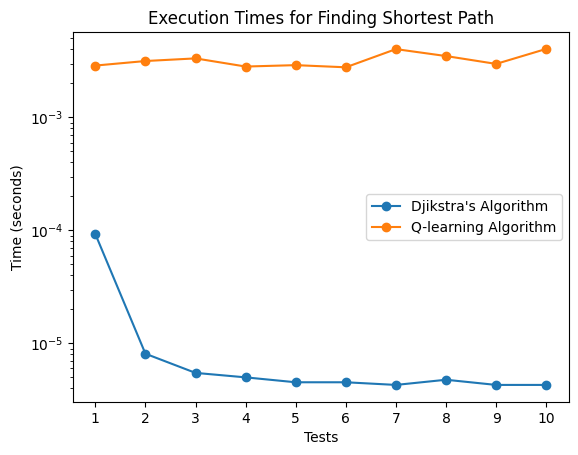

In [134]:
x = np.arange(1, 11)
plt.plot(x, djikstra_times, marker='o')
plt.plot(x, q_times, marker='o')
plt.margins(x=0.05)
plt.yscale('log')
plt.xticks(x)
plt.legend(['Djikstra\'s Algorithm', 'Q-learning Algorithm'])
plt.ylabel('Time (seconds)')
plt.xlabel('Tests')
plt.title('Execution Times for Finding Shortest Path');
plt.savefig('ex_times.jpg')

## Step 9: Delete the Slice

This concludes Lab 1. Please delete your slice when you are done with your experiment.

In [ ]:
from fabrictestbed_extensions.fablib.fablib import FablibManager as fablib_manager
fablib = fablib_manager()
slice = fablib.get_slice(name="lab1")
slice.delete()